# Is Home Advantage Real? Let's Use Statistics to Find Out
## 1. Data Loading and Understanding 

Dataset URL - https://www.kaggle.com/drgilermo/home-advantage-in-soccer-and-basketball

In [ ]:
# import our modules and set our plotting style
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load our 3 datasets 
Countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/Country_facts.csv")
NBA = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/NBA.csv", encoding = "ISO-8859-1") 
Soccer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SoccerLEagues.csv", encoding = "ISO-8859-1")

In [ ]:
Countries.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


In [ ]:
NBA.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


In [ ]:
Soccer.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


## Let's start with the NBA

Let's produce a scatter plot of the away winning pct vs home winning pct

Note: The further below the diagonal line the points are, the more significant the home advantage is.

Text(0.5, 1.0, 'Home vs Away Winning PCT in the NBA')

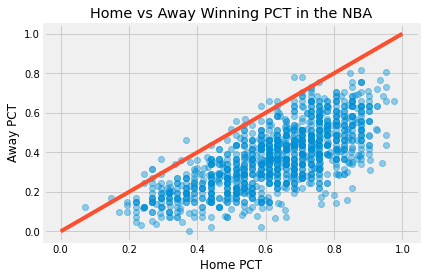

In [ ]:
plt.plot(NBA.HomePCT, NBA.AwayPCT, 'o', alpha=0.4) # alpha = shows the density with making dots transparent
plt.plot([0,1],[0,1]) # sets the scale
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away Winning PCT in the NBA')


Let's add some random noise to our data to get a clearer plot and better perspective 

In [ ]:
# create random noise between 0 and 0,01
random_noise = np.random.normal(0,0.01,len(NBA))

Text(0.5, 1.0, 'Home vs Away Winning PCT in the NBA')

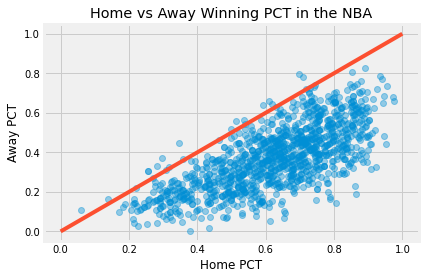

In [ ]:
plt.plot(NBA.HomePCT + random_noise, NBA.AwayPCT + random_noise, 'o', alpha=0.4) 
plt.plot([0,1],[0,1]) # sets the scale
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away Winning PCT in the NBA')


In 1216 NBA teams over the last 50 years, only 16 teams performed better away than at home.

## Now let's explore Soccer

In [ ]:
Soccer.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15,HomePCT,AwayPCT
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN,0.588235,0.0
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN,0.176471,0.0
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN,0.642857,0.0
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN,0.666667,0.0
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN,0.466667,0.0


In [ ]:
# create percentage of home and away wins
Soccer['HomePCT']  = np.true_divide(Soccer['HomeWins'], Soccer['HomeWins'] + Soccer['HomeLoss'] + Soccer['HomeDraw'])

Soccer['AwayPCT']  = np.true_divide(Soccer['AwayWins'], Soccer['AwayWins'] + Soccer['AwayLoss'] + Soccer['AwayDraw'])

In [ ]:
# create random noise between 0 and 0,01
random_noise = np.random.normal(0,0.01,len(Soccer))

Text(0.5, 1.0, 'Home vs Away Winning PCT in Soccer Leagues')

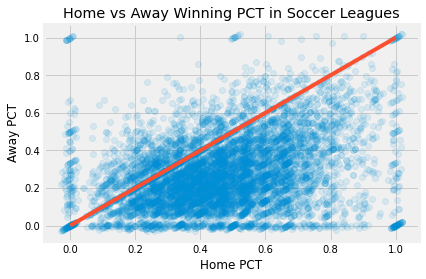

In [ ]:
# plot with random noise
plt.plot(Soccer.HomePCT + random_noise, Soccer.AwayPCT + random_noise, 'o', alpha=0.1) 
plt.plot([0,1],[0,1]) # sets the scale
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away Winning PCT in Soccer Leagues')


### The home adv is apparent in soccer too but it's less of a factor compared to NBA 

About 15% of the teams had a higher winning pct away than at home

This can be (and prob is) due to the fact a NBA season is 82 games long, which makes it less likely for a team to keep this anomaly consistently over a full year

## 2. So in which sport is home adv more siginificant?

Let's define the home factor as following: (Home PCT - Away PCT) / (Home PCT + Away PCT)

The values would range from -1 to 1, where 1 implies maximal home advantage, and the opposite for -1

In [ ]:
NBA['Home_factor'] = np.true_divide((NBA.HomePCT - NBA.AwayPCT), (NBA.HomePCT + NBA.AwayPCT))
Soccer['Home_factor'] = np.true_divide((Soccer.HomePCT - Soccer.AwayPCT), (Soccer.HomePCT + Soccer.AwayPCT))

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Home vs Away Winning PCT in Soccer Leagues and NBA')

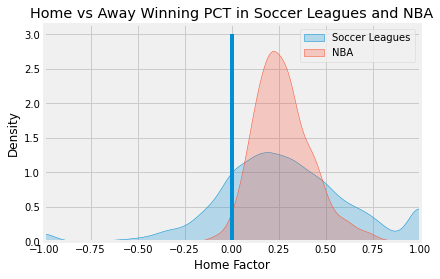

In [ ]:
# Using seaborn Kernel Density Plot
sns.kdeplot(Soccer.Home_factor, shade = True)
sns.kdeplot(NBA.Home_factor, shade = True)
plt.xlim([-1,1])
plt.legend(['Soccer Leagues', 'NBA'])
plt.plot([0,0],[0,3])
plt.xlabel('Home Factor')
plt.title('Home vs Away Winning PCT in Soccer Leagues and NBA')


## Analysis

While the soccer histogram is wider - again prob due to fact soccer seasons are much shorter, allowing for more statistical outliers, (as well as single soccer matches are arguably more random) - the mean is effectively the same!

This is a bit strange. If home advantage depends on things like referees, long bus rides, hostile audience, etc, I would expect home adv to behave very differently in American Basketball and worldwide soccer. 

But it doesn't imploy that the home advantage may stem from deeper and more basic human behaviour

## Let's see how the goals difference changes between home and away

Text(0, 0.5, 'Away Goals Difference')

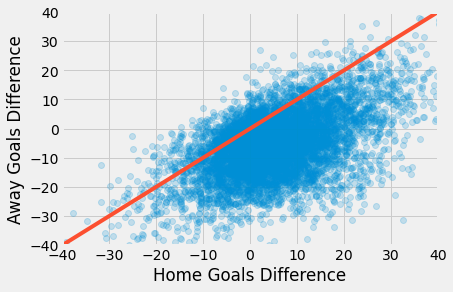

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(Soccer.HomeRatio + np.random.normal(0,0.5,len(Soccer)), Soccer.AwayGoalsDiff + np.random.normal(0,0.5,len(Soccer)), 'o', alpha = 0.2)
plt.plot([-100,80], [-100,80])
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xlabel('Home Goals Difference')
plt.ylabel('Away Goals Difference')

## 3. Has the effect changed over time? 

Since we have NBA data for a few decades, let's see if it has developed over time

(1950.0, 2010.0)

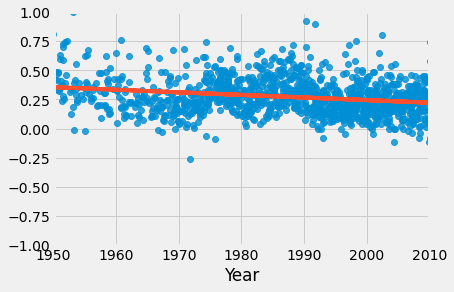

In [ ]:
plt.plot(NBA.Year + np.random.normal(0,0.5,len(NBA)), NBA.Home_factor, 'o', alpha = 0.8)
x = NBA.Year
y = NBA.Home_factor
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,fit_fn(x))
plt.xlabel('Year')
plt.ylim([-1,1])
plt.xlim([1950,2010])

It seems like there is a modest decline in home adv in the last decads 

Let's see what other factors can affect this phenomenon. 

It is conventional wisdom that one of the causes is the home crowd who pushes the home team and frigtning or annoying the away team, but is it really the case? 

It is difficult to test it since we don't have teh crowd size in each and every game, but we do have the avg league attendance.

Text(0.5, 0, 'Average Attendance per game in the league')

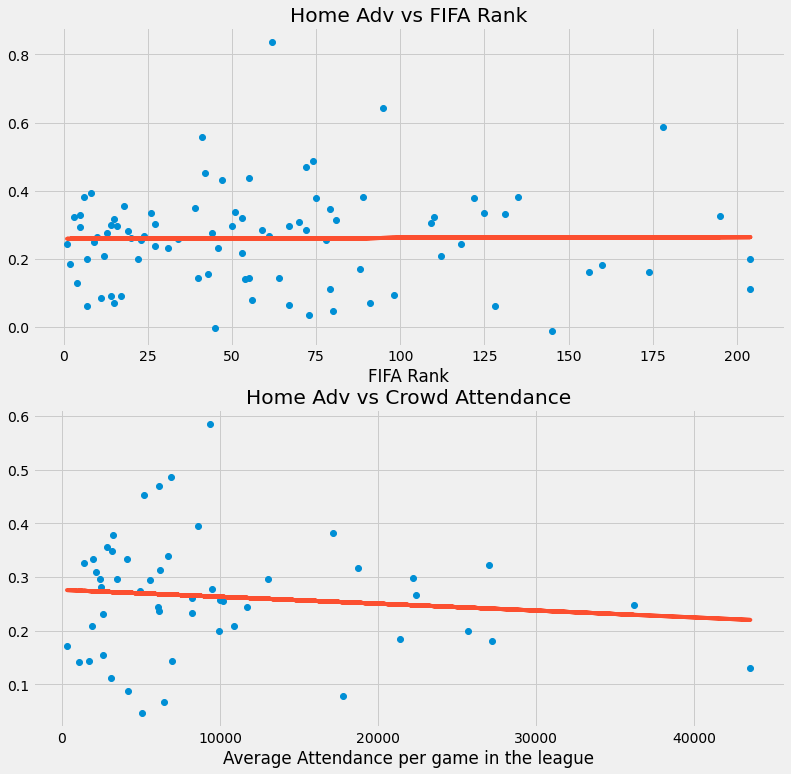

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.title("Home Adv vs FIFA Rank")
plt.plot(Countries.FIFA_Rank, Countries.Home_Away_Contrast, 'o')
x = Countries.FIFA_Rank
y = Countries.Home_Away_Contrast
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x, fit_fn(x))
plt.xlabel('FIFA Rank')

plt.subplot(2,1,2)
plt.title('Home Adv vs Crowd Attendance')
plt.plot(Countries.Attendance, Countries.Home_Away_Contrast, 'o')
x = Countries.Attendance[Countries.Attendance>0]
y = Countries.Home_Away_Contrast[Countries.Attendance>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,fit_fn(x))
plt.xlabel('Average Attendance per game in the league')

Not only home adv didn't go up with avg attendance, but it was actually the other way around. 

Also, we see that the home advantage does not depend on the FIFA rank of the country. 

Let's explore more general correlations which are not necessarily directly connected to sports and soccer

Text(0.5, 1.0, 'Literacy')

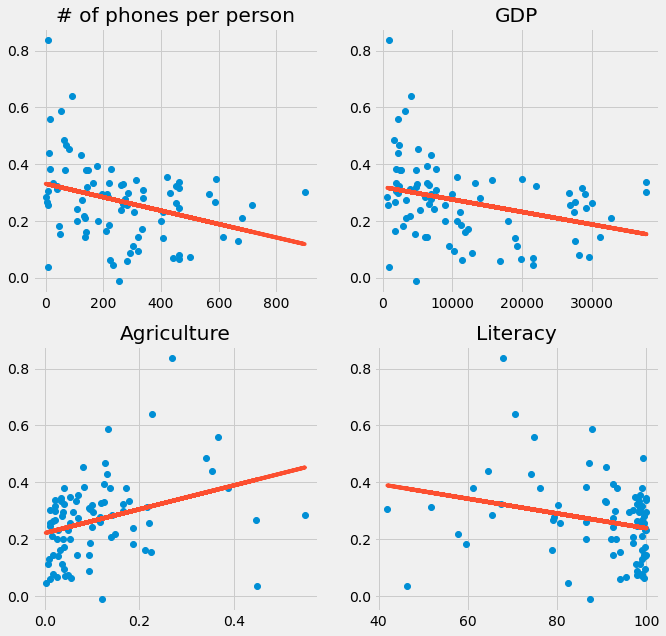

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
x = Countries.Phones[Countries.Phones>0]
y = Countries.Home_Away_Contrast[Countries.Phones>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,y,'o')
plt.plot(x, fit_fn(x))
plt.title("# of phones per person")

plt.subplot(2,2,2)
x = Countries.GDP[Countries.GDP>0]
y = Countries.Home_Away_Contrast[Countries.GDP>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,y,'o')
plt.plot(x, fit_fn(x))
plt.title("GDP")

plt.subplot(2,2,3)
x = Countries.Agriculture[Countries.Agriculture>0]
y = Countries.Home_Away_Contrast[Countries.Agriculture>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,y,'o')
plt.plot(x, fit_fn(x))
plt.title("Agriculture")

plt.subplot(2,2,4)
x = Countries.Literacy[Countries.Literacy>0]
y = Countries.Home_Away_Contrast[Countries.Literacy>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn)
plt.plot(x,y,'o')
plt.plot(x, fit_fn(x))
plt.title("Literacy")

Interestingly enough, it seems by far strongest predictors are indicators of general development, like number of phones per person, literacy and GDP. 

The more developed the country, the less significant the home advantage is (in soccer at least).

